In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [2]:
# Load the dataset
df = pd.read_csv("sample_data_100.csv")
print( df.head())


   Name   Age  Gender   Salary         City
0   Bob  48.0  Female  30055.0       Dallas
1   Tom  56.0  Female      NaN       Denver
2   Bob  57.0    Male  58699.0  Los Angeles
3  John  38.0    Male  97661.0       Boston
4  John  27.0    Male  74247.0      Chicago


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    100 non-null    object 
 1   Age     91 non-null     float64
 2   Gender  93 non-null     object 
 3   Salary  91 non-null     float64
 4   City    90 non-null     object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


In [5]:
df.describe()

,Age,Salary
count,91.000000,91.000000
mean,39.384615,59027.142857
std,11.298741,21167.334771
min,20.000000,30055.000000
25%,30.000000,38539.500000
50%,39.000000,57446.000000
75%,48.000000,74917.000000
max,58.000000,97661.000000


In [7]:

df[['Age','Salary']].isnull().sum()

Age       9
Salary    9
dtype: int64

In [10]:
# Fill numerical missing values with mean
df[['Age','Salary']]=df[['Age','Salary']].fillna(df[['Age','Salary']].mean())


In [13]:
df[['Gender','City']].isnull().sum()

Gender     7
City      10
dtype: int64

In [14]:
# Fill categorical missing values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    100 non-null    object 
 1   Age     100 non-null    float64
 2   Gender  100 non-null    object 
 3   Salary  100 non-null    float64
 4   City    100 non-null    object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


In [16]:
ohe = OneHotEncoder(sparse_output=False)
ohe_encoded = ohe.fit_transform(df[['Gender','City']])

In [18]:
ohe_encoded_df = pd.DataFrame(
    ohe_encoded , columns=ohe.get_feature_names_out(['Gender','City'])
)
ohe_encoded_df

,Gender_Female,Gender_Male,City_Boston,City_Chicago,City_Dallas,City_Denver,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,City_Seattle
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = pd.concat([df,ohe_encoded_df],axis=1)

In [20]:
df

,Name,Age,Gender,Salary,City,Gender_Female,Gender_Male,City_Boston,City_Chicago,City_Dallas,City_Denver,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,City_Seattle
0,Bob,48.0,Female,30055.000000,Dallas,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tom,56.0,Female,59027.142857,Denver,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bob,57.0,Male,58699.000000,Los Angeles,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,John,38.0,Male,97661.000000,Boston,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John,27.0,Male,74247.000000,Chicago,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Daniel,30.0,Female,97444.000000,Houston,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,Alice,40.0,Male,38567.000000,Boston,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Olivia,45.0,Female,95441.000000,New York,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,Alice,44.0,Female,35415.000000,Houston,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.drop(['Gender', 'City'], axis=1,inplace=True)

In [22]:
df

,Name,Age,Salary,Gender_Female,Gender_Male,City_Boston,City_Chicago,City_Dallas,City_Denver,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,City_Seattle
0,Bob,48.0,30055.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tom,56.0,59027.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bob,57.0,58699.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,John,38.0,97661.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John,27.0,74247.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Daniel,30.0,97444.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,Alice,40.0,38567.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Olivia,45.0,95441.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,Alice,44.0,35415.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Standardize the data 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Age','Salary']])

In [26]:
df

,Name,Age,Salary,Gender_Female,Gender_Male,City_Boston,City_Chicago,City_Dallas,City_Denver,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,City_Seattle
0,Bob,48.0,30055.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tom,56.0,59027.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bob,57.0,58699.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,John,38.0,97661.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,John,27.0,74247.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Daniel,30.0,97444.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,Alice,40.0,38567.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Olivia,45.0,95441.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,Alice,44.0,35415.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt

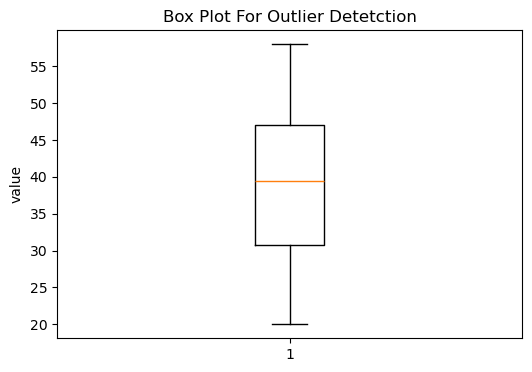

In [30]:
# Visual inspection with a box plot ('
plt.figure(figsize=(6,4))
plt.boxplot(df['Age'])
plt.title('Box Plot For Outlier Detetction')
plt.ylabel('value')
plt.show()

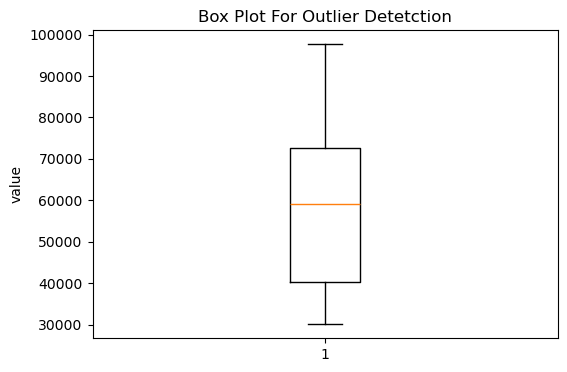

In [31]:
# Visual inspection with a box plot ('
plt.figure(figsize=(6,4))
plt.boxplot(df['Salary'])
plt.title('Box Plot For Outlier Detetction')
plt.ylabel('value')
plt.show()

In [32]:
# Convert to DataFrame
processed_df = pd.DataFrame(df)
print("Processed Data:\n", processed_df.head())


Processed Data:
    Name   Age        Salary  Gender_Female  Gender_Male  City_Boston  \
0   Bob  48.0  30055.000000            1.0          0.0          0.0   
1   Tom  56.0  59027.142857            1.0          0.0          0.0   
2   Bob  57.0  58699.000000            0.0          1.0          0.0   
3  John  38.0  97661.000000            0.0          1.0          1.0   
4  John  27.0  74247.000000            0.0          1.0          0.0   

   City_Chicago  City_Dallas  City_Denver  City_Houston  City_Los Angeles  \
0           0.0          1.0          0.0           0.0               0.0   
1           0.0          0.0          1.0           0.0               0.0   
2           0.0          0.0          0.0           0.0               1.0   
3           0.0          0.0          0.0           0.0               0.0   
4           1.0          0.0          0.0           0.0               0.0   

   City_Miami  City_New York  City_San Francisco  City_Seattle  
0         0.0         

In [34]:
# Save processed data
processed_df.to_csv("processed_data.csv", index=False)
print("Data pipeline completed successfully! ✅")


Data pipeline completed successfully! ✅
